In [46]:
import sys
import os
sys.path.insert(0, os.path.abspath('../src'))
import model_parameters as MP
import numpy as np
import networkx as nx
from networkx.algorithms.centrality import betweenness_centrality as BC
from networkx.algorithms.centrality import degree_centrality as DC
import matplotlib.pyplot as plt
from experiment.network_generator import gen_network
import pandas as pd
import networkx.algorithms.centrality as nxac


In [71]:
def max_degree(grph):
    nn = max(grph.degree, key=lambda x: x[1])
    grph.remove_node(nn[0])
    return nn[0]

def max_degree_b(grph, seen):
    max_val = max(grph.degree, key=lambda x: x[1])[1]
    nns = [n for n in grph.degree if n[1] == max_val]
    nns_ = [n for n in nns if n[0] not in seen]
    if len(nns_)>0:
        ec = nxac.betweenness_centrality(grph)
        nn = min(nns_, key=lambda x: ec[x[0]])
    else:
        ec = nxac.betweenness_centrality(grph)
        nn = min(nns, key=lambda x: ec[x[0]])
    print(nn)
    neighbors = grph.neighbors(nn[0])
    grph.remove_node(nn[0])
    seen |= set(list(neighbors))
    return (nn[0], seen)

def sort_nodes_to_inc_span(grph):
    head=list()
    seen = set()
    for _ in range(len(grph.degree)):
        elem, seen = max_degree_b(grph, seen)
        head.append(elem)
    return head


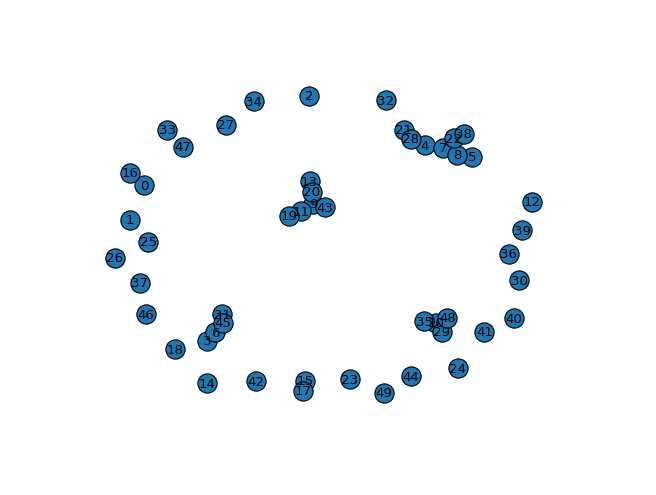

[7, 9, 10, 6, 28, 5, 11, 13, 15, 22, 31, 0, 1, 2, 3, 4, 8, 12, 14, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [72]:
N_i_j, g = gen_network(n=50, seed=1, net_type='barabasi', m=4, p=None, drop_prob=.9)
plt.style.use('classic')
nx.draw(g, pos=nx.fruchterman_reingold_layout(g), with_labels=True)
plt.show()
print([max_degree(g) for i in range(len(g.nodes()))])

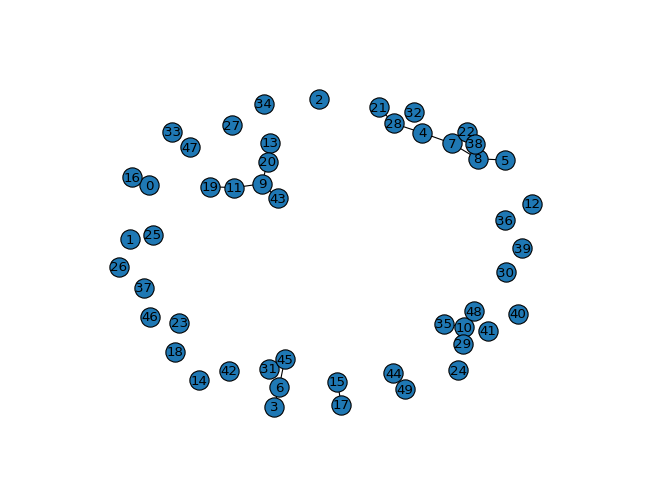

(10, 3)
(9, 3)
(7, 3)
(28, 2)
(6, 2)
(5, 1)
(13, 1)
(15, 1)
(19, 1)
(31, 1)
(38, 1)
(0, 0)
(1, 0)
(2, 0)
(12, 0)
(14, 0)
(16, 0)
(18, 0)
(23, 0)
(24, 0)
(25, 0)
(26, 0)
(27, 0)
(30, 0)
(32, 0)
(33, 0)
(34, 0)
(36, 0)
(37, 0)
(39, 0)
(40, 0)
(41, 0)
(42, 0)
(44, 0)
(46, 0)
(47, 0)
(49, 0)
(3, 0)
(4, 0)
(8, 0)
(11, 0)
(17, 0)
(20, 0)
(21, 0)
(22, 0)
(29, 0)
(35, 0)
(43, 0)
(45, 0)
(48, 0)
[10, 9, 7, 28, 6, 5, 13, 15, 19, 31, 38, 0, 1, 2, 12, 14, 16, 18, 23, 24, 25, 26, 27, 30, 32, 33, 34, 36, 37, 39, 40, 41, 42, 44, 46, 47, 49, 3, 4, 8, 11, 17, 20, 21, 22, 29, 35, 43, 45, 48]


In [73]:
N_i_j, g = gen_network(n=50, seed=1, net_type='barabasi', m=4, p=None, drop_prob=.90)
plt.style.use('classic')
nx.draw(g, pos=nx.spring_layout(g, k=1/4), with_labels=True)
plt.show()
print(sort_nodes_to_inc_span(g))

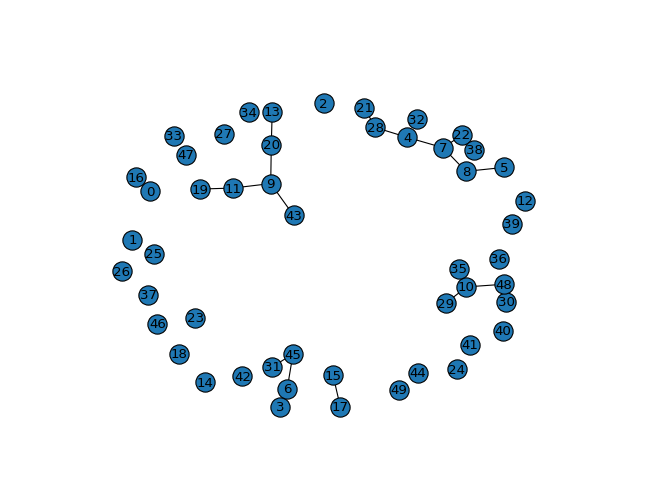

In [41]:
N_i_j, g = gen_network(n=50, seed=1, net_type='barabasi', m=4, p=None, drop_prob=.90)
plt.style.use('classic')
nx.draw(g, pos=nx.fruchterman_reingold_layout(g, k=1/3), with_labels=True)
plt.show()
ec = nxac.eigenvector_centrality_numpy(g)
dc = nxac.degree_centrality(g)
nodes_cent = pd.DataFrame(data=[(k1,v1,v2) for ((k1,v1),(_,v2)) in zip(ec.items(), dc.items())], columns=['node','eigenvalue','degree'])

In [45]:
nodes_cent.sort_values(by=["degree", "eigenvalue"], ascending=[False, True])

,node,eigenvalue,degree
10,10,9.700146e-17,0.061224
9,9,8.943743e-15,0.061224
7,7,5.913742e-01,0.061224
6,6,8.426618e-18,0.040816
45,45,1.409990e-16,0.040816
20,20,6.116328e-15,0.040816
11,11,6.171803e-15,0.040816
28,28,2.796218e-01,0.040816
8,8,3.851210e-01,0.040816
22,22,3.851210e-01,0.040816


In [14]:
sorted(ec.items(), key=lambda item:-item[1])

[(7, 0.5913741874274828),
 (4, 0.4293743509940411),
 (22, 0.38512103920770985),
 (8, 0.38512103920770974),
 (28, 0.2796217687202294),
 (38, 0.18985288633867964),
 (5, 0.18985288633867953),
 (21, 0.13784497461856532),
 (9, 9.614738761140363e-15),
 (11, 7.166661421010603e-15),
 (20, 6.828396861036802e-15),
 (43, 5.012665161893406e-15),
 (13, 3.570390670271474e-15),
 (19, 3.4968825087814746e-15),
 (16, 1.4084769595944811e-16),
 (35, 1.0882387012699452e-16),
 (30, 1.0870349725708299e-16),
 (26, 9.567570922101963e-17),
 (0, 8.728309326357966e-17),
 (48, 8.326672684688673e-17),
 (25, 6.534276370821149e-17),
 (27, 6.28837560929922e-17),
 (1, 6.022247358825211e-17),
 (49, 5.5511151231257815e-17),
 (40, 5.462434762842867e-17),
 (23, 5.440954192696704e-17),
 (24, 4.96772385281095e-17),
 (6, 3.3308533476715093e-17),
 (18, 3.250309799122488e-17),
 (14, 3.011373983309395e-17),
 (12, 1.8723131877821798e-17),
 (32, 1.7592120927125675e-17),
 (42, 1.4922485584408768e-17),
 (29, 1.3816531216220955e-17),